In [1]:
import pandas as pd
import numpy as np
import string, re

pd.options.display.max_rows = 50



In [4]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords ## TEST
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

# nltk.download('stopwords') ##
# nltk.download('punkt') ##
# nltk.download('wordnet') ##

In [5]:
df = pd.read_csv('data/glassdoor_ratings_main.csv')
df.head()

,NAME,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET
0,McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1
1,Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1
2,UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1
3,UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1
4,Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1


## TESTING

### Preprocessing TEST

#### Tokenization

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as n-gram, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here" "David works", "works here"

In [4]:
description = df.iloc[0, 12].lower()
description

'we work with leaders across sectors to tackle some of their toughest challenges, e.g.: how to best grow a start-up, improve early education, or quickly enter a new market. we serve organizations of all sizes, ranging from small-to-midsized companies with revenues less than $5bn a year to 90 of the top 100 companies on the forbes global 2000 list. we have more than 120 offices, 22 industry practices, and eight functional practices. while most of our work is in the private sector, we serve ~80 governments, and we’ve completed ~4,000 projects for social sector organizations in the last five years. \n\nthat means whatever your passion, you will find others working on similar topics at mckinsey. if you know what you want to do, you can do it here. if you don’t know what you want to do, come to mckinsey to explore. visit our careers website to learn more and apply. subscribe to our careers blog for weekly job alerts and stories about our colleagues.'

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_description = tokenizer.tokenize(description)

In [6]:
fdist = FreqDist(tokenized_description)
print(fdist)

<FreqDist with 120 samples and 172 outcomes>


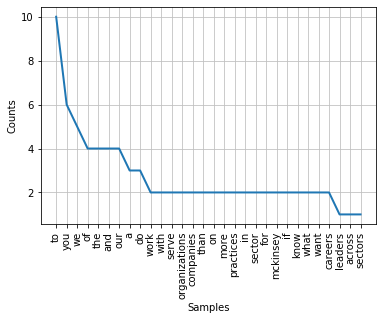

In [7]:
#should I remove capital letters?
plt.figure()
fdist.plot(30)

#### Stop Words

In [8]:
## automatic stop words, but you can add your own words as well
stop_words=set(stopwords.words("english")) 

In [9]:
filtered_description=[]
for w in tokenized_description:
    if w not in stop_words:
        filtered_description.append(w)
print("Filterd Sentence:",filtered_description)

Filterd Sentence: ['work', 'leaders', 'across', 'sectors', 'tackle', 'toughest', 'challenges', 'e', 'g', 'best', 'grow', 'start', 'improve', 'early', 'education', 'quickly', 'enter', 'new', 'market', 'serve', 'organizations', 'sizes', 'ranging', 'small', 'midsized', 'companies', 'revenues', 'less', '5bn', 'year', '90', 'top', '100', 'companies', 'forbes', 'global', '2000', 'list', '120', 'offices', '22', 'industry', 'practices', 'eight', 'functional', 'practices', 'work', 'private', 'sector', 'serve', '80', 'governments', 'completed', '4', '000', 'projects', 'social', 'sector', 'organizations', 'last', 'five', 'years', 'means', 'whatever', 'passion', 'find', 'others', 'working', 'similar', 'topics', 'mckinsey', 'know', 'want', 'know', 'want', 'come', 'mckinsey', 'explore', 'visit', 'careers', 'website', 'learn', 'apply', 'subscribe', 'careers', 'blog', 'weekly', 'job', 'alerts', 'stories', 'colleagues']


In [10]:
## After filtering words, words are now in half
print(len(tokenized_description))
print(len(filtered_description))

172
91


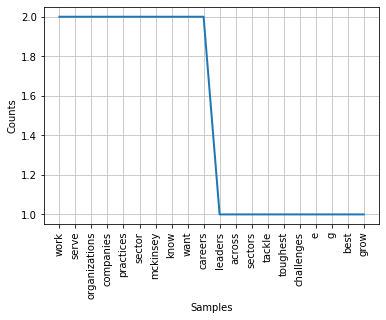

In [11]:
fdist = FreqDist(filtered_description)
plt.figure()
fdist.plot(20)

#### Stemming

In [12]:
from nltk.stem import PorterStemmer

In [13]:
ps = PorterStemmer()

stemmed_description=[]
for w in filtered_description:
    stemmed_description.append(ps.stem(w))

print(stemmed_description)

['work', 'leader', 'across', 'sector', 'tackl', 'toughest', 'challeng', 'e', 'g', 'best', 'grow', 'start', 'improv', 'earli', 'educ', 'quickli', 'enter', 'new', 'market', 'serv', 'organ', 'size', 'rang', 'small', 'midsiz', 'compani', 'revenu', 'less', '5bn', 'year', '90', 'top', '100', 'compani', 'forb', 'global', '2000', 'list', '120', 'offic', '22', 'industri', 'practic', 'eight', 'function', 'practic', 'work', 'privat', 'sector', 'serv', '80', 'govern', 'complet', '4', '000', 'project', 'social', 'sector', 'organ', 'last', 'five', 'year', 'mean', 'whatev', 'passion', 'find', 'other', 'work', 'similar', 'topic', 'mckinsey', 'know', 'want', 'know', 'want', 'come', 'mckinsey', 'explor', 'visit', 'career', 'websit', 'learn', 'appli', 'subscrib', 'career', 'blog', 'weekli', 'job', 'alert', 'stori', 'colleagu']


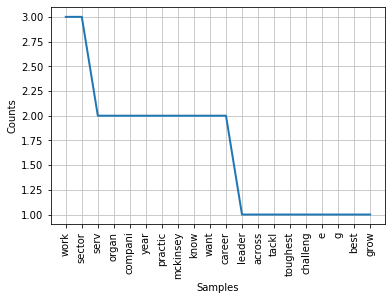

In [14]:
fdist = FreqDist(stemmed_description)
fdist.plot(20)

### Feature Engineering TEST
 - BoW or TF-IDF?

## WORKING

**Preprocessing**

In [6]:
#preprocessing imports
import string, re
pd.set_option('max_colwidth',100)

In [7]:
##CORPUS:
#define features and target
data = df['FULL_DESCRIPTION'] 
target = df['TARGET']

In [8]:
df.FULL_DESCRIPTION.loc[0] #transcript in tutorial

'We work with leaders across sectors to tackle some of their toughest challenges, e.g.: how to best grow a start-up, improve early education, or quickly enter a new market. We serve organizations of all sizes, ranging from small-to-midsized companies with revenues less than $5bn a year to 90 of the top 100 companies on the Forbes Global 2000 list. We have more than 120 offices, 22 industry practices, and eight functional practices. While most of our work is in the private sector, we serve ~80 governments, and we’ve completed ~4,000 projects for social sector organizations in the last five years. \n\nThat means whatever your passion, you will find others working on similar topics at McKinsey. If you know what you want to do, you can do it here. If you don’t know what you want to do, come to McKinsey to explore. Visit our Careers website to learn more and apply. Subscribe to our Careers Blog for weekly job alerts and stories about our colleagues.Mission: Our mission is two-fold: to help 

In [9]:
# ## setting stopwords and punctuations
# sw_list = stopwords.words('english')
# sw_list += list(string.punctuation) #appending to stopwords
# sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',
#             'said', 'one', 'com', '-', '–', '—', '--', "'s", 'e.g', "'ll",
#              'company', 'services', 'world', 'people', 'care', 'health', 'us',
#            ]

# sw_set = set(sw_list) #list of stop words
# #sw_set #Sanity Check

In [ ]:
### tokenizer = RegexpTokenizer(r'[a-zA-Z0-9!]+')#instaniating a reg ex tokenizer

# final_df.text = df.CLEAN_DESCRIPTION.apply(lambda x: tokenizer.tokenize(x)) #applying it to the text column


In [54]:
df.DESCRIPTION[1]

'Cornell is a private, Ivy League university recognized as a leading-edge employer and exemplary research university. Our main campus is located in Ithaca, New York, but our reach spans the globe. Cornell has campuses in New York City and Doha, Qatar, as well as dozens of research stations in New York State and beyond.\n\nStaff, faculty, and students thrive at Cornell because of its unparalleled combination of quality and breadth; its open, collaborative and innovative culture; its founding commitment to diversity and inclusion; its vibrant rural and urban campuses; and its land-grant legacy of public engagement.'

In [10]:
#we can define a function that cleans FULL_DESCRIPTION
#remove digits
#tokenize
#remove stop words
# def process_description(description):
#     description.lower()
#     description = re.sub('\w*\d\w*', "", description) #remove digits
#     #tokens = nltk.word_tokenize(description) #tokenize
#     stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set] #remove stop words
#     return stopwords_removed 

In [20]:
# # applying the above function to our data/features with map() method
# processed_data = list(map(process_description, df.FULL_DESCRIPTION))

In [21]:
df.head()

,NAME,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET
0,McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,"We work with leaders across sectors to tackle some of their toughest challenges, e.g.: how to be...","Mission: Our mission is two-fold: to help our clients make distinctive, lasting, and substantial...","We work with leaders across sectors to tackle some of their toughest challenges, e.g.: how to be...",1
1,Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university recognized as a leading-edge employer and exemplary ...",,"Cornell is a private, Ivy League university recognized as a leading-edge employer and exemplary ...",1
2,UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit the books at the University of California at Santa...",,"Dude, let's hit the beach! And then we'll hit the books at the University of California at Santa...",1
3,UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Southern California location, what more could you wan...",,"Sun, the beach, Nobel Prize winners, and a Southern California location, what more could you wan...",1
4,Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and Technology (ISU) can be a whirlwind experience fo...,,Attending Iowa State University of Science and Technology (ISU) can be a whirlwind experience fo...,1


In [22]:
processed_data[:10]

[['work',
  'leaders',
  'across',
  'sectors',
  'tackle',
  'toughest',
  'challenges',
  'best',
  'grow',
  'start-up',
  'improve',
  'early',
  'education',
  'quickly',
  'enter',
  'new',
  'market',
  'serve',
  'organizations',
  'sizes',
  'ranging',
  'small-to-midsized',
  'companies',
  'revenues',
  'less',
  'year',
  'top',
  'companies',
  'forbes',
  'global',
  'list',
  'offices',
  'industry',
  'practices',
  'eight',
  'functional',
  'practices',
  'work',
  'private',
  'sector',
  'serve',
  'governments',
  'completed',
  'projects',
  'social',
  'sector',
  'organizations',
  'last',
  'five',
  'years',
  'means',
  'whatever',
  'passion',
  'find',
  'others',
  'working',
  'similar',
  'topics',
  'mckinsey',
  'know',
  'want',
  'know',
  'want',
  'come',
  'mckinsey',
  'explore',
  'visit',
  'careers',
  'website',
  'learn',
  'apply',
  'subscribe',
  'careers',
  'blog',
  'weekly',
  'job',
  'alerts',
  'stories',
  'colleagues.mission',
  

In [23]:
#take a look at the number of words in vocab
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

17022

In [14]:
## save as a DOCUMENT TERM MATRIX? ## 

### Baseline model - code along with lecture
- Random Forest with Lemmatization, trigrams
- **try also with BoW instead of TF-IDF??**
- **try also with Stemming instead of Lemmatization??** 

2/10 Results:
- Testing Accuracy: 0.5662
- Testing Precision: 0.5437
- Testing Recall: 0.4807
- F1 Score: 0.5103


In [24]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

# creating a list with all lemmatized outputs
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [25]:
lemmatized_output[0]

'work leader across sector tackle toughest challenge best grow start-up improve early education quickly enter new market serve organization size ranging small-to-midsized company revenue le year top company forbes global list office industry practice eight functional practice work private sector serve government completed project social sector organization last five year mean whatever passion find others working similar topic mckinsey know want know want come mckinsey explore visit career website learn apply subscribe career blog weekly job alert story colleagues.mission mission two-fold help client make distinctive lasting substantial improvement performance build firm attracts develops excites retains exceptional element strongly connected helping client solve toughest problem requires best best drawn work matter together supportive dedicated colleague'

In [26]:
#defining X_lem for modeling process
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
#X_lem[0] #Sanity Check

['work leader across sector tackle toughest challenge best grow start-up improve early education quickly enter new market serve organization size ranging small-to-midsized company revenue le year top company forbes global list office industry practice eight functional practice work private sector serve government completed project social sector organization last five year mean whatever passion find others working similar topic mckinsey know want know want come mckinsey explore visit career website learn apply subscribe career blog weekly job alert story colleagues.mission mission two-fold help client make distinctive lasting substantial improvement performance build firm attracts develops excites retains exceptional element strongly connected helping client solve toughest problem requires best best drawn work matter together supportive dedicated colleague',
 'cornell private ivy league university recognized leading-edge employer exemplary research university main campus located ithaca 

**Train-Test Split:**

In [27]:
# always train-test split THEN tokenize / apply vectorizer 
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_list,
                       ngram_range=(1,3)) ## TEST remove stopwords, turn into uppercase, bigram/trigram

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

#
tfidf_data_train_lem


<1539x210565 sparse matrix of type '<class 'numpy.float64'>'
	with 320565 stored elements in Compressed Sparse Row format>

In [ ]:
## Tokenize here? ##

### EDA

In [ ]:
# X_lem.shape()

In [ ]:
# # Look at the most common top words --> add them to the stop word list
# from collections import Counter

# # Let's first pull out the top 30 words for each comedian
# words = []
# for company in df.iterrows:
#     top = [word for (word, count) in top_dict[company]]
#     for t in top:
#         words.append(t)
        
# words

In [28]:
# 99% of columns are 0 -- very sparce df
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 208.2943469785575
Percentage of columns containing ZERO: 0.9990107836203617


#### Most Frequent Words - EDA

In [29]:
df_freq_inclusive = df[df['TARGET']==1]
df_freq_not_inclusive = df[df['TARGET']==0]

In [30]:
data_incl = df_freq_inclusive['FULL_DESCRIPTION']
data_not_incl = df_freq_not_inclusive['FULL_DESCRIPTION']

In [31]:
pros_incl = list(map(process_description, data_incl))
pros_not_incl = list(map(process_description, data_not_incl))

In [32]:
total_vocab_incl = set()
for comment in pros_incl:
    total_vocab_incl.update(comment)
len(total_vocab_incl)

10465

In [33]:
total_vocab_NOT_incl = set()
for comment in pros_not_incl:
    total_vocab_NOT_incl.update(comment)
len(total_vocab_NOT_incl)

12369

In [34]:
flat_incl = [item for sublist in pros_incl for item in sublist]
flat_not_incl = [item for sublist in pros_not_incl for item in sublist]

In [35]:
inclusive_freq = FreqDist(flat_incl)
not_inclusive_freq = FreqDist(flat_not_incl)

In [36]:
# Top 20 inclusive words:
inclusive_freq.most_common(20)

[('work', 341),
 ('business', 323),
 ('customers', 302),
 ('university', 294),
 ('new', 250),
 ('solutions', 241),
 ('every', 231),
 ('best', 230),
 ('employees', 227),
 ('technology', 222),
 ('global', 214),
 ('service', 214),
 ('also', 211),
 ('products', 210),
 ('across', 208),
 ('largest', 201),
 ('make', 200),
 ('including', 198),
 ('mission', 195),
 ('team', 191)]

In [37]:
# Top 20 non-inclusive words:
not_inclusive_freq.most_common(20)

[('customers', 384),
 ('products', 369),
 ('solutions', 368),
 ('work', 340),
 ('business', 325),
 ('global', 319),
 ('employees', 288),
 ('new', 286),
 ('every', 266),
 ('also', 262),
 ('leading', 252),
 ('technology', 251),
 ('service', 244),
 ('largest', 239),
 ('including', 239),
 ('university', 232),
 ('across', 232),
 ('clients', 225),
 ('mission', 211),
 ('management', 210)]

#### Normalized word frequencies:

In [38]:
#Inclusive
inclusive_total_word_count = sum(inclusive_freq.values())
inclusive_top_25 = inclusive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in inclusive_top_25:
    normalized_frequency = word[1]/inclusive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

work 		 0.00512
business 		 0.00485
customers 		 0.004535
university 		 0.004414
new 		 0.003754
solutions 		 0.003619
every 		 0.003468
best 		 0.003453
employees 		 0.003408
technology 		 0.003333
global 		 0.003213
service 		 0.003213
also 		 0.003168
products 		 0.003153
across 		 0.003123
largest 		 0.003018
make 		 0.003003
including 		 0.002973
mission 		 0.002928
team 		 0.002868
help 		 0.002838
financial 		 0.002733
life 		 0.002703
companies 		 0.002643
leading 		 0.002643


In [39]:
#Not inclusive
not_inclusive_total_word_count = sum(not_inclusive_freq.values())
not_inclusive_top_25 = not_inclusive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in not_inclusive_top_25:
    normalized_frequency = word[1]/not_inclusive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

customers 		 0.004877
products 		 0.004687
solutions 		 0.004674
work 		 0.004318
business 		 0.004128
global 		 0.004052
employees 		 0.003658
new 		 0.003632
every 		 0.003378
also 		 0.003328
leading 		 0.003201
technology 		 0.003188
service 		 0.003099
largest 		 0.003036
including 		 0.003036
university 		 0.002947
across 		 0.002947
clients 		 0.002858
mission 		 0.00268
management 		 0.002667
help 		 0.002578
team 		 0.002566
communities 		 0.002553
best 		 0.002553
industry 		 0.002477


#### Visualization
- Bar Chart

In [40]:
# create counts of satire and not satire with values and words
inclusive_bar_counts = [x[1] for x in inclusive_freq.most_common(25)]
inclusive_bar_words = [x[0] for x in inclusive_freq.most_common(25)]

not_inclusive_bar_counts = [x[1] for x in not_inclusive_freq.most_common(25)]
not_inclusive_bar_words = [x[0] for x in not_inclusive_freq.most_common(25)]

In [41]:
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

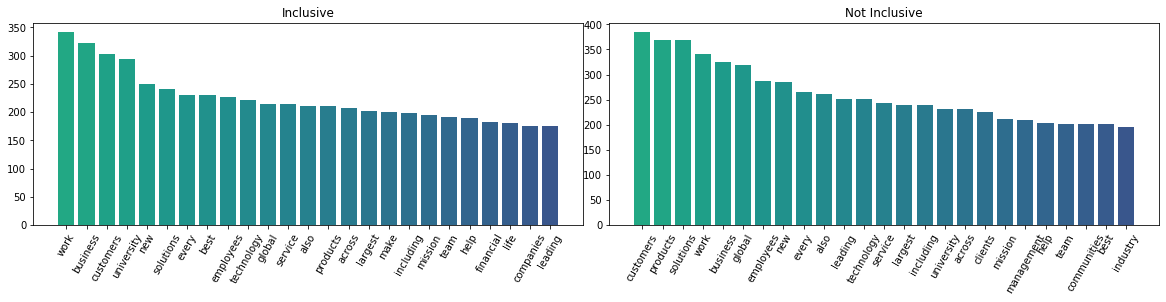

In [42]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(inclusive_bar_words, inclusive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(not_inclusive_bar_words, not_inclusive_bar_counts, color=color )

ax.title.set_text('Inclusive')
ax2.title.set_text('Not Inclusive')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

#### Visualization 
- Word Clouds

In [43]:
# Getting our data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
#!pip install wordcloud
from wordcloud import WordCloud
inclusive_dictionary = dict(zip(inclusive_bar_words, inclusive_bar_counts))
not_inclusive_dictionary = dict(zip(not_inclusive_bar_words, not_inclusive_bar_counts))

In [44]:
not_inclusive_dictionary

{'customers': 384,
 'products': 369,
 'solutions': 368,
 'work': 340,
 'business': 325,
 'global': 319,
 'employees': 288,
 'new': 286,
 'every': 266,
 'also': 262,
 'leading': 252,
 'technology': 251,
 'service': 244,
 'largest': 239,
 'including': 239,
 'university': 232,
 'across': 232,
 'clients': 225,
 'mission': 211,
 'management': 210,
 'help': 203,
 'team': 202,
 'communities': 201,
 'best': 201,
 'industry': 195}

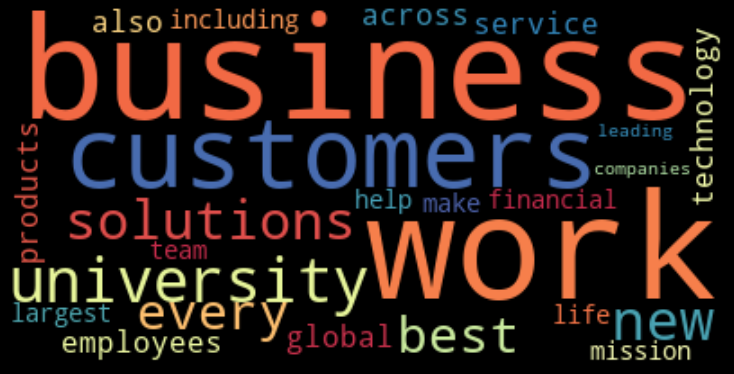

In [45]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(inclusive_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

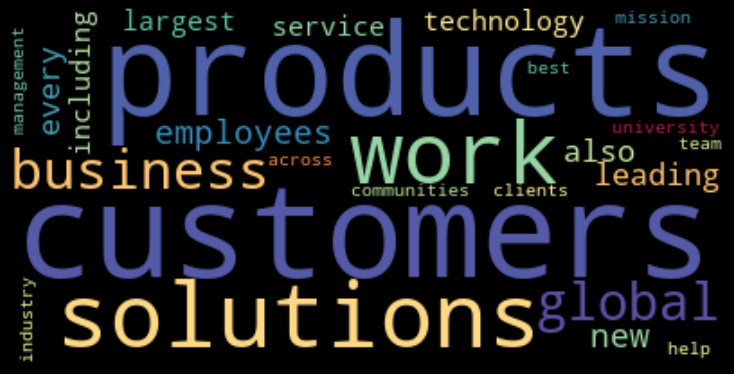

In [46]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_inclusive_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

### Classify (RF/Lem)
- Testing Accuracy: 0.5196
- F1 Score: 0.5455

In [47]:
# TEST
rf_classifier_lem = RandomForestClassifier(n_estimators=120, random_state=0)


In [48]:
## Fit model to train set
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [49]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_precision_score_lem = metrics.precision_score(y_test_lem, rf_test_preds_lem)
rf_recall_score_lem = metrics.recall_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)

print('Random Forest with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print("Testing Precision: {:.4}".format(rf_precision_score_lem))
print("Testing Recall: {:.4}".format(rf_recall_score_lem))
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features:

Testing Accuracy: 0.574
Testing Precision: 0.5541
Testing Recall: 0.4807
F1 Score: 0.5148


In [50]:
#null accuracy (??)
df.TARGET.value_counts(normalize=True)
df.TARGET.value_counts()

0    1037
1     887
Name: TARGET, dtype: int64

(2.0, 0.0)

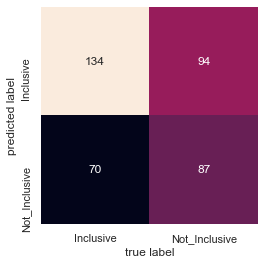

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Inclusive', 'Not_Inclusive'], yticklabels=['Inclusive', 'Not_Inclusive'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

### Next model
- RF with Stemming

Stretch:
- Sentiment analysis